In [1]:
%matplotlib inline
import pylab as plt
import numpy as np
import warnings; warnings.simplefilter('ignore')

# Vaex demo by Maarten Breddels
## install 
 * conda install -c conda-forge vaex
 * pip install --pre vaex
 
# What it is?
  * pandas like dataframe library for large datasets ($\sim 10^9$ rows)
  * mmap columnar data
  * zero memory copy policy
  * statistics on N-d grids ($+10^9$ rows/s)
  * viz built in


In [2]:
import vaex

In [3]:
ls -lh /Users/maartenbreddels/datasets/nytaxi/nyc_taxi2015.*

-rw-r--r--  1 maartenbreddels  staff    23G Oct 31 17:56 /Users/maartenbreddels/datasets/nytaxi/nyc_taxi2015.arrow
-rw-r--r--@ 1 maartenbreddels  staff    23G Oct 17 15:24 /Users/maartenbreddels/datasets/nytaxi/nyc_taxi2015.hdf5


In [5]:
df = vaex.open('/Users/maartenbreddels/datasets/nytaxi/nyc_taxi2015.arrow')
df

#,VendorID,dropoff_dayofweek,dropoff_hour,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_dayofweek,pickup_hour,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,2,3.0,19.0,40.75061798095703,-73.97478485107422,1.0,12.0,0.3,0.5,1,1,3.0,19.0,40.7501106262207,-73.993896484375,3.25,0.0,17.05,2015-01-15T19:23:42.000000000,2015-01-15T19:05:39.000000000,1.59
1,1,5.0,20.0,40.75910949707031,-73.99441528320312,0.5,14.5,0.3,0.5,1,1,5.0,20.0,40.7242431640625,-74.00164794921875,2.0,0.0,17.8,2015-01-10T20:53:28.000000000,2015-01-10T20:33:38.000000000,3.3
2,1,5.0,20.0,40.82441329956055,-73.95182037353516,0.5,9.5,0.3,0.5,1,2,5.0,20.0,40.80278778076172,-73.96334075927734,0.0,0.0,10.8,2015-01-10T20:43:41.000000000,2015-01-10T20:33:38.000000000,1.8
3,1,5.0,20.0,40.71998596191406,-74.00432586669923,0.5,3.5,0.3,0.5,1,2,5.0,20.0,40.71381759643555,-74.00908660888672,0.0,0.0,4.8,2015-01-10T20:35:31.000000000,2015-01-10T20:33:39.000000000,0.5
4,1,5.0,20.0,40.742652893066406,-74.00418090820312,0.5,15.0,0.3,0.5,1,2,5.0,20.0,40.762428283691406,-73.97117614746094,0.0,0.0,16.3,2015-01-10T20:52:58.000000000,2015-01-10T20:33:39.000000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"146,112,984",2,4.0,0.0,40.722469329833984,-73.98621368408203,0.5,7.5,0.3,0.5,5,1,3.0,23.0,40.72087097167969,-73.99381256103516,1.76,0.0,10.56,2016-01-01T00:08:18.000000000,2015-12-31T23:59:56.000000000,1.2
"146,112,985",1,4.0,0.0,40.75238800048828,-73.93951416015625,0.5,7.5,0.3,0.5,2,2,3.0,23.0,40.76028060913085,-73.96527099609375,0.0,0.0,8.8,2016-01-01T00:05:19.000000000,2015-12-31T23:59:58.000000000,2.0
"146,112,986",1,4.0,0.0,40.69329833984375,-73.9886703491211,0.5,13.5,0.3,0.5,2,2,3.0,23.0,40.73907852172852,-73.98729705810547,0.0,0.0,14.8,2016-01-01T00:12:55.000000000,2015-12-31T23:59:59.000000000,3.8
"146,112,987",2,4.0,0.0,40.705322265625,-74.01712036132812,0.5,8.5,0.3,0.5,1,2,3.0,23.0,40.72569274902344,-73.99755859375,0.0,0.0,9.8,2016-01-01T00:10:26.000000000,2015-12-31T23:59:59.000000000,1.96


## Pandas like, but uses expressions

In [6]:
df.trip_distance.values

array([1.59, 3.3 , 1.8 , ..., 3.8 , 1.96, 1.06])

In [7]:
df.trip_distance

<vaex.expression.Expression(expressions='trip_distance')> instance at 0x11b07e3c8 values=[1.59, 3.3, 1.8, 0.5, 3.0 ... (total 146112989 values) ... 1.2, 2.0, 3.8, 1.96, 1.06] 

In [8]:
df.tip_amount/df.total_amount

<vaex.expression.Expression(expressions='(tip_amount / total_amount)')> instance at 0x11b07e860 values=[0.1906158357771261, 0.11235955056179775, 0.0, 0.0, 0.0 ... (total 146112989 values) ... 0.16666666666666666, 0.0, 0.0, 0.0, 0.16666666666666666] 

In [9]:
bytes_per_column = df.trip_distance.values.dtype.itemsize * len(df)
f"{bytes_per_column:,}"

'1,168,903,912'

# Expression / Virtual columns
![expres](./meme-expressions.jpg)

In [10]:
df['tip_percentage'] = df.tip_amount/df.total_amount

In [11]:
df.tip_percentage

<vaex.expression.Expression(expressions='tip_percentage')> instance at 0x11b0a1208 values=[0.1906158357771261, 0.11235955056179775, 0.0, 0.0, 0.0 ... (total 146112989 values) ... 0.16666666666666666, 0.0, 0.0, 0.0, 0.16666666666666666] 

In [12]:
df

#,VendorID,dropoff_dayofweek,dropoff_hour,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_dayofweek,pickup_hour,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,tip_percentage
0,2,3.0,19.0,40.75061798095703,-73.97478485107422,1.0,12.0,0.3,0.5,1,1,3.0,19.0,40.7501106262207,-73.993896484375,3.25,0.0,17.05,2015-01-15T19:23:42.000000000,2015-01-15T19:05:39.000000000,1.59,0.1906158357771261
1,1,5.0,20.0,40.75910949707031,-73.99441528320312,0.5,14.5,0.3,0.5,1,1,5.0,20.0,40.7242431640625,-74.00164794921875,2.0,0.0,17.8,2015-01-10T20:53:28.000000000,2015-01-10T20:33:38.000000000,3.3,0.11235955056179775
2,1,5.0,20.0,40.82441329956055,-73.95182037353516,0.5,9.5,0.3,0.5,1,2,5.0,20.0,40.80278778076172,-73.96334075927734,0.0,0.0,10.8,2015-01-10T20:43:41.000000000,2015-01-10T20:33:38.000000000,1.8,0.0
3,1,5.0,20.0,40.71998596191406,-74.00432586669923,0.5,3.5,0.3,0.5,1,2,5.0,20.0,40.71381759643555,-74.00908660888672,0.0,0.0,4.8,2015-01-10T20:35:31.000000000,2015-01-10T20:33:39.000000000,0.5,0.0
4,1,5.0,20.0,40.742652893066406,-74.00418090820312,0.5,15.0,0.3,0.5,1,2,5.0,20.0,40.762428283691406,-73.97117614746094,0.0,0.0,16.3,2015-01-10T20:52:58.000000000,2015-01-10T20:33:39.000000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"146,112,984",2,4.0,0.0,40.722469329833984,-73.98621368408203,0.5,7.5,0.3,0.5,5,1,3.0,23.0,40.72087097167969,-73.99381256103516,1.76,0.0,10.56,2016-01-01T00:08:18.000000000,2015-12-31T23:59:56.000000000,1.2,0.16666666666666666
"146,112,985",1,4.0,0.0,40.75238800048828,-73.93951416015625,0.5,7.5,0.3,0.5,2,2,3.0,23.0,40.76028060913085,-73.96527099609375,0.0,0.0,8.8,2016-01-01T00:05:19.000000000,2015-12-31T23:59:58.000000000,2.0,0.0
"146,112,986",1,4.0,0.0,40.69329833984375,-73.9886703491211,0.5,13.5,0.3,0.5,2,2,3.0,23.0,40.73907852172852,-73.98729705810547,0.0,0.0,14.8,2016-01-01T00:12:55.000000000,2015-12-31T23:59:59.000000000,3.8,0.0
"146,112,987",2,4.0,0.0,40.705322265625,-74.01712036132812,0.5,8.5,0.3,0.5,1,2,3.0,23.0,40.72569274902344,-73.99755859375,0.0,0.0,9.8,2016-01-01T00:10:26.000000000,2015-12-31T23:59:59.000000000,1.96,0.0


In [13]:
df.mean(df.tip_percentage)

0.09604030083690276

# Lazy is good
See item 10/11 of ["10 Things I Hate About pandas"](http://wesmckinney.com/blog/apache-arrow-pandas-internals/) by Wes McKinney
> When you write df[df.c < 0].d.sum(), pandas creates a temporary DataFrame df[df.c < 0] then sums the d column of that temporary object. If df contains a lot of columns, this is ridiculously wasteful.

In [15]:
# this would cost 46+GB RAM using Pandas
# and wouldn't be possible on this laptop
print(df[df.tip_amount > 10].tip_percentage.mean())

0.19807325380334626


In [16]:
df[:15].to_pandas_df()

,VendorID,dropoff_dayofweek,dropoff_hour,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,...,pickup_dayofweek,pickup_hour,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,2,3.0,19.0,40.750618,-73.974785,1.0,12.0,0.3,0.5,1,...,3.0,19.0,40.750111,-73.993896,3.25,0.00,17.05,2015-01-15 19:23:42,2015-01-15 19:05:39,1.59
1,1,5.0,20.0,40.759109,-73.994415,0.5,14.5,0.3,0.5,1,...,5.0,20.0,40.724243,-74.001648,2.00,0.00,17.80,2015-01-10 20:53:28,2015-01-10 20:33:38,3.30
2,1,5.0,20.0,40.824413,-73.951820,0.5,9.5,0.3,0.5,1,...,5.0,20.0,40.802788,-73.963341,0.00,0.00,10.80,2015-01-10 20:43:41,2015-01-10 20:33:38,1.80
3,1,5.0,20.0,40.719986,-74.004326,0.5,3.5,0.3,0.5,1,...,5.0,20.0,40.713818,-74.009087,0.00,0.00,4.80,2015-01-10 20:35:31,2015-01-10 20:33:39,0.50
4,1,5.0,20.0,40.742653,-74.004181,0.5,15.0,0.3,0.5,1,...,5.0,20.0,40.762428,-73.971176,0.00,0.00,16.30,2015-01-10 20:52:58,2015-01-10 20:33:39,3.00
5,1,5.0,20.0,40.758194,-73.986977,0.5,27.0,0.3,0.5,1,...,5.0,20.0,40.774048,-73.874374,6.70,5.33,40.33,2015-01-10 20:53:52,2015-01-10 20:33:39,9.00
6,1,5.0,20.0,40.749634,-73.992470,0.5,14.0,0.3,0.5,1,...,5.0,20.0,40.726009,-73.983276,0.00,0.00,15.30,2015-01-10 20:58:31,2015-01-10 20:33:39,2.20
7,1,5.0,20.0,40.726326,-73.995010,0.5,7.0,0.3,0.5,3,...,5.0,20.0,40.734142,-74.002663,1.66,0.00,9.96,2015-01-10 20:42:20,2015-01-10 20:33:39,0.80
8,1,5.0,21.0,40.759357,-73.987595,0.0,52.0,0.3,0.5,3,...,5.0,20.0,40.644356,-73.783043,0.00,5.33,58.13,2015-01-10 21:11:35,2015-01-10 20:33:39,18.20
9,1,5.0,20.0,40.759365,-73.985916,0.5,6.5,0.3,0.5,2,...,5.0,20.0,40.767948,-73.985588,1.55,0.00,9.35,2015-01-10 20:40:44,2015-01-10 20:33:40,0.90


In [17]:
df[:15].to_arrow_table()

pyarrow.Table
VendorID: int64
dropoff_dayofweek: double
dropoff_hour: double
dropoff_latitude: double
dropoff_longitude: double
extra: double
fare_amount: double
improvement_surcharge: double
mta_tax: double
passenger_count: int64
payment_type: int64
pickup_dayofweek: double
pickup_hour: double
pickup_latitude: double
pickup_longitude: double
tip_amount: double
tolls_amount: double
total_amount: double
tpep_dropoff_datetime: timestamp[ns]
tpep_pickup_datetime: timestamp[ns]
trip_distance: double

# N-d statistic and viz

In [18]:
counts2d = df.count(binby=[df.pickup_longitude, df.pickup_latitude], shape=(128,128))
counts2d

array([[ 1.,  4.,  7., ...,  1.,  1.,  0.],
       [ 8.,  8., 14., ...,  0.,  1.,  0.],
       [21.,  8.,  7., ...,  0.,  1.,  1.],
       ...,
       [ 1.,  5.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

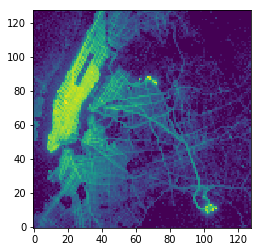

In [19]:
plt.imshow(np.log(counts2d.T+1), origin='lower')

In [20]:
df.plot_widget(df.pickup_longitude, df.pickup_latitude, f='log', controls_selection=False, backend='ipyleaflet')

In [21]:
df.plot_widget(df.pickup_longitude, df.pickup_latitude, f='log', controls_selection=True)

In [22]:
df.tip_percentage.mean(selection=True)

0.09994679777354425

In [23]:
def arc_distance(theta_1, phi_1, theta_2, phi_2):
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    distance = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return distance * 6400/1.6

In [24]:
# Distance between Groningen (NL) and London
arc_distance(53.2217306,6.568327,
             51.5183731,-0.1429305)

309.6463699075278

In [25]:
df['arc_distance'] = arc_distance(df.pickup_longitude,
                                  df.pickup_latitude,
                                  df.dropoff_longitude,
                                  df.dropoff_latitude)

In [26]:
df.arc_distance.expand()

<vaex.expression.Expression(expressions='(((2 * arctan2(sqrt(((sin(((((dropoff_longitude - pickup_longitude) / 2) * 3.141592653589793) / 180)) ** 2) + ((cos(((pickup_longitude * 3.141592653589793) / 180)) * cos(((dropoff_longitude * 3.141592653589793) / 180))) * (sin(((((dropoff_latitude - pickup_latitude) / 2) * 3.141592653589793) / 180)) ** 2)))), sqrt((1 - ((sin(((((dropoff_longitude - pickup_longitude) / 2) * 3.141592653589793) / 180)) ** 2) + ((cos(((pickup_longitude * 3.141592653589793) / 180)) * cos(((dropoff_longitude * 3.141592653589793) / 180))) * (sin(((((dropoff_latitude - pickup_latitude) / 2) * 3.141592653589793) / 180)) ** 2))))))) * 6400) / 1.6)')> instance at 0xc8dcc3208 values=[1.334279493569286, 0.8397761147639515, 0.9060504934442801, 0.35290605998411856, 2.33542574256004 ... (total 146112989 values) ... 0.5313936486688771, 1.8046061013109977, 0.8867955238694628, 1.4207645620439129, 0.4773600750179836] 

In [27]:
%%time
df.mean(df.tip_percentage)

CPU times: user 1.73 s, sys: 21.6 ms, total: 1.75 s
Wall time: 268 ms


0.09604030083691173

In [28]:
%%time
df.mean(df.arc_distance)

CPU times: user 35.9 s, sys: 7.48 s, total: 43.3 s
Wall time: 8.82 s


1.8301208899585686

In [29]:
df['arc_distance_jit'] = df.arc_distance.jit_numba()
# df['arc_distance_jit'] = df.arc_distance.jit_pythran()

In [30]:
%%time
df.mean(df.arc_distance_jit)

CPU times: user 15.4 s, sys: 141 ms, total: 15.6 s
Wall time: 2.11 s


1.8301208899585961

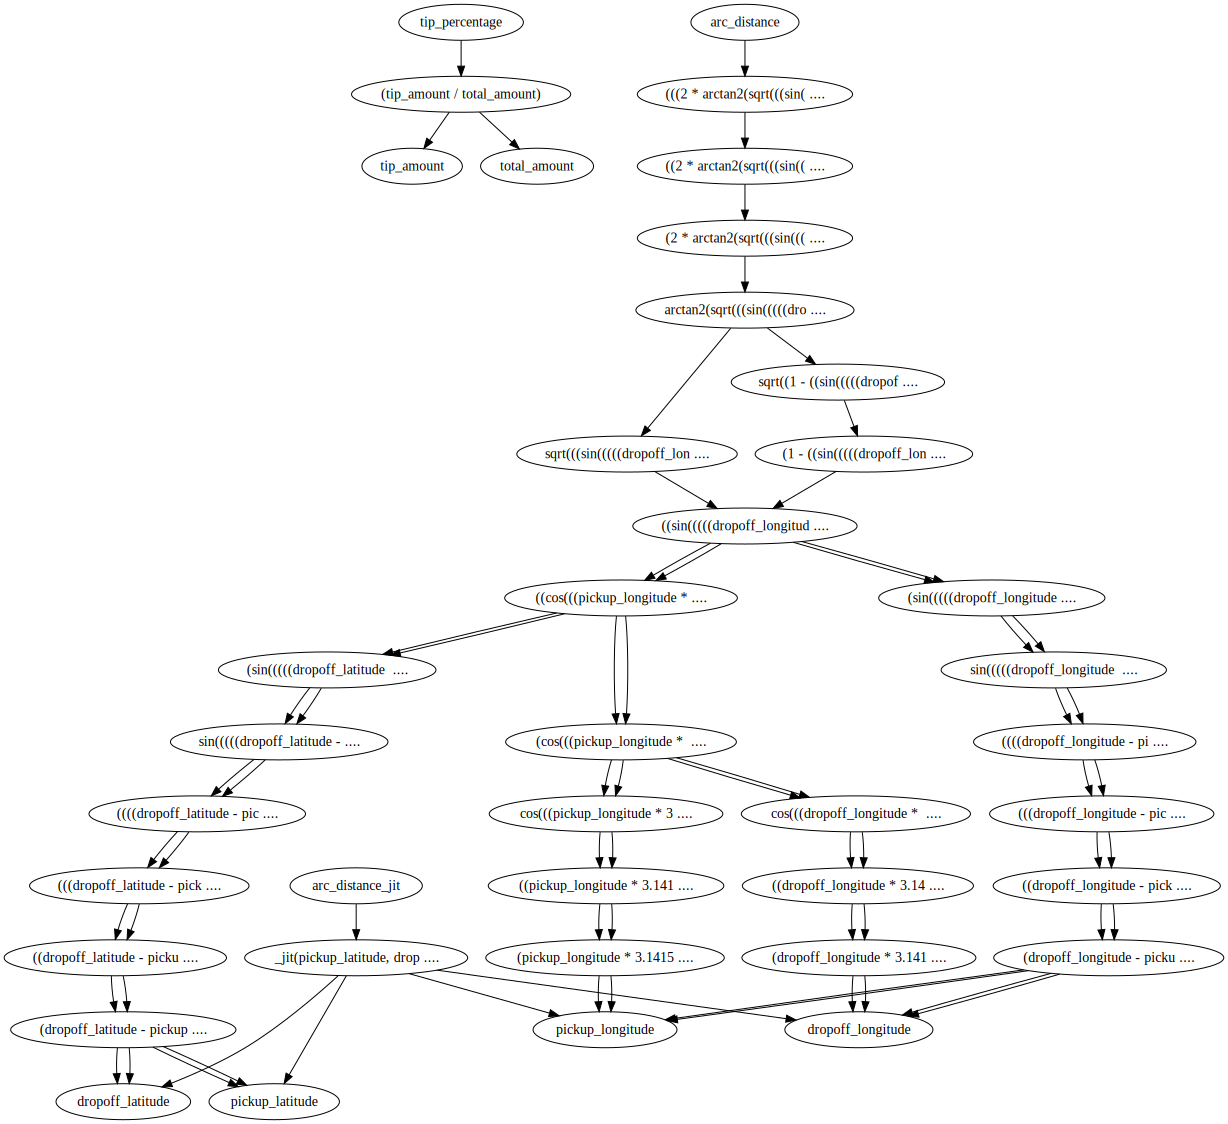

In [31]:
df._graphviz()

# 1 billion rows?

In [32]:
!ls -lh '/Users/maartenbreddels/datasets/nytaxi/nyc_taxi_all.hdf5'

-rw-r--r--@ 1 maartenbreddels  staff   135G Jun  6  2018 /Users/maartenbreddels/datasets/nytaxi/nyc_taxi_all.hdf5


In [33]:
df1b = vaex.open('/Users/maartenbreddels/datasets/nytaxi/nyc_taxi_all.hdf5')

In [34]:
df1b

#,dropoff_dayofweek,dropoff_hour,dropoff_latitude,dropoff_longitude,fare_amount,mta_tax,passenger_count,payment_type,pickup_dayofweek,pickup_hour,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,3.0,19.0,40.75061798095703,-73.97478485107422,12.0,0.5,1,1,3.0,19.0,40.7501106262207,-73.993896484375,3.25,0.0,17.05,2015-01-15T19:23:42.000000000,2015-01-15T19:05:39.000000000,1.59
1,5.0,20.0,40.75910949707031,-73.99441528320312,14.5,0.5,1,1,5.0,20.0,40.7242431640625,-74.00164794921875,2.0,0.0,17.8,2015-01-10T20:53:28.000000000,2015-01-10T20:33:38.000000000,3.3
2,5.0,20.0,40.82441329956055,-73.95182037353516,9.5,0.5,1,2,5.0,20.0,40.80278778076172,-73.96334075927734,0.0,0.0,10.8,2015-01-10T20:43:41.000000000,2015-01-10T20:33:38.000000000,1.8
3,5.0,20.0,40.71998596191406,-74.00432586669923,3.5,0.5,1,2,5.0,20.0,40.71381759643555,-74.00908660888672,0.0,0.0,4.8,2015-01-10T20:35:31.000000000,2015-01-10T20:33:39.000000000,0.5
4,5.0,20.0,40.742652893066406,-74.00418090820312,15.0,0.5,1,2,5.0,20.0,40.762428283691406,-73.97117614746094,0.0,0.0,16.3,2015-01-10T20:52:58.000000000,2015-01-10T20:33:39.000000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,008,842,980",5.0,8.0,40.774517,-73.870063,28.1,0.5,1,0,5.0,8.0,40.771608,-73.98265999999998,0.0,5.5,34.1,2010-03-20T08:41:00.000000000,2010-03-20T08:15:00.000000000,11.15
"1,008,842,981",1.0,14.0,40.757468,-73.97167,7.3,0.5,1,1,1.0,14.0,40.759042,-73.98585,0.0,0.0,7.8,2010-03-16T14:41:00.000000000,2010-03-16T14:30:00.000000000,1.02
"1,008,842,982",4.0,22.0,40.754197,-73.991538,3.3,0.5,1,1,4.0,22.0,40.75184,-73.98651499999998,0.0,0.0,4.3,2010-03-19T22:40:00.000000000,2010-03-19T22:38:00.000000000,0.31
"1,008,842,983",3.0,14.0,40.738565,-73.98636,5.3,0.5,2,0,3.0,14.0,40.742438,-73.977537,2.0,0.0,7.8,2010-03-18T14:47:00.000000000,2010-03-18T14:41:00.000000000,0.72


In [35]:
df1b['tip_percentage'] = df1b.tip_amount/df1b.total_amount

In [36]:
df1b[df1b.tip_amount > 10].tip_percentage.mean(progress=True)

[########################################]:  100.00% elapsed time  :       22s =  0.4m =  0.0h    
 

0.203933458561028

In [37]:
df1b.plot_widget(df1b.pickup_longitude, df1b.pickup_latitude, f='log', controls_selection=True)

In [ ]:
# df_remote = vaex.open('ws://gaia:10000/nyc_taxi2015')

# Vaex
 * Known API (Pandas)
 * Super fast
 * Expressions, no direct computation
   * does not waste RAM
   * JIT-ing
   * derivatives
   * machine learning: no more pipelines
 * Remote datasets
     * expressions and statistics gets transported, not data
     

In [ ]:
import vaex
ds = vaex.open('/Users/maartenbreddels/datasets/aquarius/Aq-A-2-999-shuffled.hdf5')
ds.set_active_fraction(0.2)
ds.plot_widget('x', 'y', 'z', f='log', extent=[[40, 60]]*3, backend='ipyvolume', shape=100)